## Final Project Submission

Please fill out:
* Student name: Ian Macharia
* Student pace:  full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Movie studio analysis


### Importing relevant packages

In [1]:

# importing relevant Packages.
"""The packages we use are the built upon base Python language
They include:
Numpy Package for mathematical analysis if we will need
Pandas package - which will be used for cleaning and subsetting the data into dataframe
SQlite3 package for extracting data from databases used.
Matplotlib package for some basic visualization
Seaborn package for more detailed visualizations
it is common practice to import the packages using their aliases rather than
having to call their full names.
"""
#importing Numpy
import numpy as np
#importing Pandas
import pandas as pd
#importing SQLite3
import sqlite3 as sqlite3
#importing Matplotlib
import matplotlib.pyplot as plt
#importing Seaborn
import seaborn as sns

## Data Understanding

### Reading Datasets

#### Data set one: Movie Gross Sales

In [2]:
"""This is data on the gross sales of movies"""

#reading the data
movie_gross = pd.read_csv(".Data/bom.movie_gross.csv")

#looking into the data
#print(movie_gross)


"""We notice the data contains 3387 rows and five columns as below:"""

movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


##### Cleaning  this dataset

In [3]:
#next, we check wether this data contains any missing information
movie_gross.info()
print("""We notice the data contains missing values in all columns except two: title and year
we also notice the foreign_gross is anobject type yet it is an integer
We observe that the title and year columns do not have missing values
Studio column has 5 missing values,
domestic_gross has 28 missing values and 
foreign_gross has the most missing values with 1350 rows missing values""")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
We notice the data contains missing values in all columns except two: title and year
we also notice the foreign_gross is anobject type yet it is an integer
We observe that the title and year columns do not have missing values
Studio column has 5 missing values,
domestic_gross has 28 missing values and 
foreign_gross has the most missing values with 1350 rows missing values


In [4]:
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(',', '').astype(float)

In [5]:
#counting the missing values in the other columns
movie_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
"""to be able to understand the data better, we are going tosubset it below
to only contain data in the foreign gross without the missing rows. 
we will then carry out descriptive analysis of the same to understand the mean, maximum value,
minimum valueand thestandard deviation. """
#the code below drops all the missing values
mvg = movie_gross['foreign_gross'].dropna()
#we encountered a value that contained a coma(,) so we needed to remove it
mvg = mvg.replace(',', '').astype(float)
#below are the statitstical analysis of the new data frame with 2037 rows
print("Number of Rows:", mvg.count())
print("Maximum Value:", mvg.max())
print("Minimum Value:", mvg.min())
print("Mean:", mvg.mean().round())
print("Median Value:", mvg.median())
print("Standard Deviation:", mvg.std().round())


Number of Rows: 2037
Maximum Value: 960500000.0
Minimum Value: 600.0
Mean: 74872810.0
Median Value: 18700000.0
Standard Deviation: 137410601.0


In [7]:
#randnum = list(np.random.randint(low=600, high=9605000))
#type(randnum)
mvg = movie_gross['foreign_gross']
#movie_gross.foreign_gross = movie_gross.foreign_gross.fillna(randnum)
print (mvg.apply(lambda x: np.random.randint(low=600, high=9605000) if pd.isnull(x) else x))

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382      6978088.0
3383      2437229.0
3384      5066303.0
3385      3317881.0
3386      7592613.0
Name: foreign_gross, Length: 3387, dtype: float64


In [8]:
"""This is a function that generates a series of 
random numbers between min value 600 and value 9605000, 
since using the max value will give a skewed datsset
we with use these numbers to fill the null values in the data,
so that we can avoid removing almost 40% of the data.
"""

def rand_gross_null(data):
    replace_null = mvg.apply(lambda x: np.random.randint(low=600, high=9605000) if pd.isnull(x) else x)
    return replace_null

In [9]:
#Here we apply the above function to our dataset and confirm the changes are made.
movie_gross['foreign_gross'] = rand_gross_null(movie_gross['foreign_gross'])


movie_gross['foreign_gross']

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382      5175321.0
3383       308314.0
3384      4897985.0
3385      8667067.0
3386      2641461.0
Name: foreign_gross, Length: 3387, dtype: float64

In [10]:

print("""Looking at the new dataset,we observe a huge unrealisting  replacement on some of the values
a movie could not possibly earn more in that 100% the domestic market in the foreign market;
we check our previously subset data without the replaced value find if there were any occurences  of the same.
We observe that this is a normal occurence although not at that percentage.
To be able to make a more informed decision,
we will look at how such a change will affect the meanmedian and standard 
deviation for our original dataset.""")
movie_gross

Looking at the new dataset,we observe a huge unrealisting  replacement on some of the values
a movie could not possibly earn more in that 100% the domestic market in the foreign market;
we check our previously subset data without the replaced value find if there were any occurences  of the same.
We observe that this is a normal occurence although not at that percentage.
To be able to make a more informed decision,
we will look at how such a change will affect the meanmedian and standard 
deviation for our original dataset.


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,5175321.0,2018
3383,Edward II (2018 re-release),FM,4800.0,308314.0,2018
3384,El Pacto,Sony,2500.0,4897985.0,2018
3385,The Swan,Synergetic,2400.0,8667067.0,2018


In [11]:
"""To be able to conduct analysis using this data
we need to remove or replace the missing values"""
#removing missing values in the studio column
movie_gross.dropna(subset=['studio'], inplace=True)
#removing missing values in the domestic_gross column
movie_gross.dropna(subset=['domestic_gross'], inplace=True)

In [12]:
print(movie_gross.info())
print(""" we now see the final dataframe has a total of 3356 after final cleaning. 
Now our dataset is ready to use""")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB
None
 we now see the final dataframe has a total of 3356 after final cleaning. 
Now our dataset is ready to use


##### Data set two: Movie information

In [13]:
#reading additional datasets
movie_info = pd.read_table(".Data/rt.movie_info.tsv",index_col=None)

#looking into the data
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [14]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [15]:
#counting the missing values
movie_info.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

We observe that only the id column does not have missing values
looking at the extreem number of missing valuesin the currency and box office columns,
we have no option but to drop them.
we can keep the studio column and try later to fill them from movie_gross dataset.
alternatively we can discard it from use at this time.

In [16]:
movie_info = movie_info.dropna()
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",$,"72,700,000",126 minutes,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",$,"1,320,005",123 minutes,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",129 minutes,Eros Entertainment


The above function significantly redues out dataset, therefore using in in the analysis will mean a reduced number of datapoints therefore we will not have a comprehensive analysis.
We can opt to use it in the end while sampling to try and explain our findings

##### Data set three: Movie Reviews

In [17]:
#reading additional datasets
movie_reviews = pd.read_table(".Data/rt.reviews.tsv",encoding='unicode_escape',index_col=False)

#looking into the data
movie_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [18]:
#counting the missing values
print("Number of missing values per column:")

print(movie_reviews.isnull().sum())

print("""We observe the data contain a very high number of mising values
therefore we might consider not using this dataset at this time,
just as the above dataset. 
although the initial data contains 54432 rows, 
and the resulting rows after the drop are 33988 
""")

Number of missing values per column:
id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64
We observe the data contain a very high number of mising values
therefore we might consider not using this dataset at this time,
just as the above dataset. 
although the initial data contains 54432 rows, 
and the resulting rows after the drop are 33988 



In [19]:
movie_reviews = movie_reviews.dropna()
movie_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
...,...,...,...,...,...,...,...,...
54419,2000,"Sleek, shallow, but frequently amusing.",2.5/4,fresh,Gene Seymour,1,Newsday,"September 27, 2002"
54420,2000,The spaniel-eyed Jean Reno infuses Hubert with...,3/4,fresh,Megan Turner,1,New York Post,"September 27, 2002"
54421,2000,"Manages to be somewhat well-acted, not badly a...",1.5/4,rotten,Bob Strauss,0,Los Angeles Daily News,"September 27, 2002"
54422,2000,Arguably the best script that Besson has writt...,3.5/5,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002"


##### Data set four: Movies

In [20]:
#reading additional datasets
movies = pd.read_csv(".Data/.tmdb.movies.csv",index_col=0)#,encoding='unicode_escape',index_col=False)

#looking into the data
movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [21]:
#counting the missing values
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [22]:
print("""From this dataframe, we observe there are no missing values, 
but upon investigation of the data
we notice that they used placeholders
in the data such as - _EXHIBIT_84xxx_ in the column original title,
0.600 for the popularity column and 0.0 in the vote_average column,
among other unidentified values.
we can deal with this later just before visualization.
""")

From this dataframe, we observe there are no missing values, 
but upon investigation of the data
we notice that they used placeholders
in the data such as - _EXHIBIT_84xxx_ in the column original title,
0.600 for the popularity column and 0.0 in the vote_average column,
among other unidentified values.
we can deal with this later just before visualization.



##### Data set five: Movie Budgets

In [23]:
#reading additional datasets
movie_budgets = pd.read_csv(".Data/.tn.movie_budgets.csv",index_col=0)#,encoding='unicode_escape',index_col=False)

#looking into the data
movie_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [24]:
"""Here we will write a function that will strip
commas and dollar sign on the production_budget,domestic_gross and worldwide_gross
"""
#striping from production budget column
movie_budgets.production_budget = movie_budgets.production_budget.str.replace('$', '')
movie_budgets.production_budget = movie_budgets.production_budget.str.replace(',', '')
movie_budgets.production_budget = movie_budgets.production_budget.astype(int)

In [25]:
#striping from domestic gross column
movie_budgets.domestic_gross = movie_budgets.domestic_gross.str.replace('$', '')
movie_budgets.domestic_gross = movie_budgets.domestic_gross.str.replace(',', '')
movie_budgets.domestic_gross = movie_budgets.domestic_gross.astype(int)

In [26]:
#striping from domestic gross column
movie_budgets.worldwide_gross = movie_budgets.worldwide_gross.str.replace('$', '')
movie_budgets.worldwide_gross = movie_budgets.worldwide_gross.str.replace(',', '')
movie_budgets = movie_budgets.rename(columns={'movie':'title'})
movie_budgets.worldwide_gross = movie_budgets.worldwide_gross.astype(float)

In [27]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   title              5782 non-null   object 
 2   production_budget  5782 non-null   int32  
 3   domestic_gross     5782 non-null   int32  
 4   worldwide_gross    5782 non-null   float64
dtypes: float64(1), int32(2), object(2)
memory usage: 225.9+ KB


In [28]:
movie_budgets.isnull().sum()

release_date         0
title                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

#### Joining the relevant Datasets

In [29]:
print("""Below we will now join our three datasets,
movies, movie_bedgets and movie_gross""")
mov_analysis = pd.concat([movie_budgets,movie_gross,movies],names=['title'],join='outer')
mov_analysis.info()

Below we will now join our three datasets,
movies, movie_bedgets and movie_gross
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35655 entries, 1 to 26516
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       32299 non-null  object 
 1   title              35655 non-null  object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     9138 non-null   float64
 4   worldwide_gross    5782 non-null   float64
 5   studio             3356 non-null   object 
 6   foreign_gross      3356 non-null   float64
 7   year               3356 non-null   float64
 8   genre_ids          26517 non-null  object 
 9   id                 26517 non-null  float64
 10  original_language  26517 non-null  object 
 11  original_title     26517 non-null  object 
 12  popularity         26517 non-null  float64
 13  vote_average       26517 non-null  float64
 14  vote_count         26517 non-null  fl

In [30]:
print("""We observe we have a total of 35655 rows. with a majority of the columns having
missing values and studio having the least.
From here we will drop all other rows and remain only with those in the studio column""")

We observe we have a total of 35655 rows. with a majority of the columns having
missing values and studio having the least.
From here we will drop all other rows and remain only with those in the studio column


In [31]:
#This codedrops all the unwanted columns
mov_analysis.drop(['genre_ids', 'id','original_language','original_title','popularity','vote_average','vote_count'], axis=1, inplace=True)

In [32]:
mov_analysis.info()
print("""Futher cleaning is expected to be done on this data.
We then fill the existing missing values using standard practice,
""")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35655 entries, 1 to 26516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       32299 non-null  object 
 1   title              35655 non-null  object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     9138 non-null   float64
 4   worldwide_gross    5782 non-null   float64
 5   studio             3356 non-null   object 
 6   foreign_gross      3356 non-null   float64
 7   year               3356 non-null   float64
dtypes: float64(5), object(3)
memory usage: 2.4+ MB
Futher cleaning is expected to be done on this data.
We then fill the existing missing values using standard practice,



In [33]:
mov_analysis.isnull().sum()

release_date          3356
title                    0
production_budget    29873
domestic_gross       26517
worldwide_gross      29873
studio               32299
foreign_gross        32299
year                 32299
dtype: int64

In [34]:
mov_analysis = mov_analysis.drop_duplicates()
mov_analysis

,release_date,title,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,NaN,NaN,NaN
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,NaN,NaN,NaN
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,NaN,NaN,NaN
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,NaN,NaN,NaN
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
26512,2018-10-13,Laboratory Conditions,NaN,NaN,NaN,NaN,NaN,NaN
26513,2018-05-01,_EXHIBIT_84xxx_,NaN,NaN,NaN,NaN,NaN,NaN
26514,2018-10-01,The Last One,NaN,NaN,NaN,NaN,NaN,NaN
26515,2018-06-22,Trailer Made,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:

mov_analysis.dropna(subset=['production_budget'], inplace=True)

mov_analysis

,release_date,title,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,NaN,NaN,NaN
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,NaN,NaN,NaN
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,NaN,NaN,NaN
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,NaN,NaN,NaN
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,NaN,NaN,NaN
79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,NaN,NaN,NaN
80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,NaN,NaN,NaN
81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,NaN,NaN,NaN


In [36]:
#Here we calculate the foreign sales by subrtacting domestic sales from worldwide sales
#mov_analysis['foreign_gross'] = mov_analysis['worldwide_gross'] - mov_analysis['domestic_gross']
def calculate_foreign_gross(row):
    return row['worldwide_gross'] - row['domestic_gross']
mov_analysis['foreign_gross'] = mov_analysis.apply(calculate_foreign_gross, axis=1)

In [78]:
"""Here we will strip the year from the release date column,
which we have used to fill our dataset year column as below
ten we will create a new column for the month""" 
mov_analysis['year'] = pd.to_datetime(mov_analysis['release_date']).dt.strftime('%Y')
mov_analysis['month'] = pd.to_datetime(mov_analysis['release_date']).dt.strftime('%m')

In [74]:
"""For the Studio column, 
we will first create a list of studios from the movie_gross dataset"""
studios = movie_gross.studio

In [75]:
mov_analysis.studio.fillna(studios, inplace=True)
mov_analysis.studio.isnull().sum()

0

In [76]:
mov_analysis.isnull().sum()

release_date         0
title                0
production_budget    0
domestic_gross       0
worldwide_gross      0
studio               0
foreign_gross        0
year                 0
profit               0
month                0
dtype: int64

In [79]:

print("""Now our dataframe is ready for analysis,
although for the foreign_gross and worldwide_gross values 
are still written in scientific format but we need them to be in 
normal format""")

#here we write the function to remove the scientific format
pd.options.display.float_format = '{:.2f}'.format
#checking if the dataset for changes
mov_analysis.head()

Now our dataframe is ready for analysis,
although for the foreign_gross and worldwide_gross values 
are still written in scientific format but we need them to be in 
normal format


,release_date,title,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year,profit,month
1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00,BV,2015837654.00,2009,2351345279.00,12
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,WB,804600000.00,2011,635063875.00,05
3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00,WB,107000000.00,2019,-200237650.00,06
4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,P/DW,944008095.00,2015,1072413963.00,05
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,Sum.,696540365.00,2017,999721747.00,12


In [82]:
#creating a profit column
def calculate_profit(row):
    return (row['domestic_gross']+row['foreign_gross']) - row['production_budget']
mov_analysis['profit'] = mov_analysis.apply(calculate_profit, axis=1)
"""We observe that some of the columns are negative values indicative of a loss
which we do not need in our analysis at the moment. Below we will remove these values from ur dataframe"""
mov_analysis['profit'] = mov_analysis['profit'].mask(mov_analysis['profit'] < 0)

# drop rows containing NaNs
mov_analysis = mov_analysis.dropna(subset=['profit'])
mov_analysis['profit']

1    2351345279.00
2     635063875.00
4    1072413963.00
5     999721747.00
6    1747311220.00
          ...     
74      2034928.00
75       834926.00
76        64644.00
79       234495.00
82       179941.00
Name: profit, Length: 3657, dtype: float64

## Data Visualization

### Understanding Project Requirements

The project must focus on identifying the types of movies that are currently doing well in the market and provide actionable insights to the head of Microsoft's new movie studio. The stakeholders in this project include Microsoft executives, investors, and potential moviegoers who are interested in watching new and exciting movies. The problem is to find the right strategy for Microsoft's new movie studio by understanding the audience's preferences and current market trends. By identifying the types of films that are currently successful, Microsoft can create a plan that aligns with the market's demand and attract potential customers.

To explore what types of films are currently doing the best at the box office, we can analyze the provided data set of movies. The relevant columns to consider for this analysis are genres, averagerating, domestic_gross, and worldwide_gross.

In [83]:
grouped = mov_analysis.groupby('studio').agg({
    'production_budget': 'sum',
    'domestic_gross': 'sum',
    'worldwide_gross': 'sum',
    'foreign_gross': 'sum',
    'profit': 'sum'
})
grouped

,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit
studio,,,,,
BV,14173634000.00,23959847912.00,52879877062.00,28920029150.00,38706243062.00
CBS,1435010000.00,2055813774.00,4973767583.00,2917953809.00,3538757583.00
CL,2799071082.00,4065241035.00,8340880826.00,4275639791.00,5541809744.00
Focus,1509900000.00,2685566653.00,5761086729.00,3075520076.00,4251186729.00
Fox,19980829000.00,31233473293.00,70045929302.00,38812456009.00,50065100302.00
FoxS,2704238783.00,4698429938.00,9787922596.00,5089492658.00,7083683813.00
LGF,9698155000.00,16632679630.00,35671185399.00,19038505769.00,25973030399.00
MBox,2913972000.00,4871408848.00,9948721717.00,5077312869.00,7034749717.00
MGM,1312525000.00,2075133257.00,4004886259.00,1929753002.00,2692361259.00


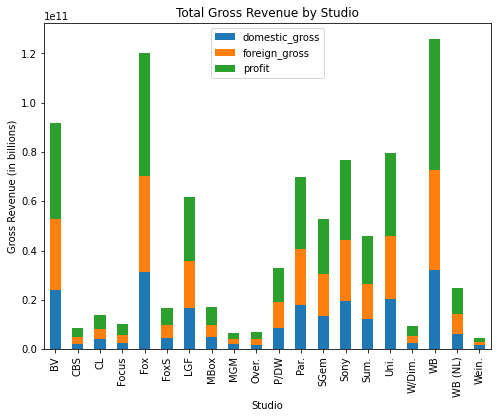

In [86]:
#Create a stacked bar plot of the domestic_gross, foreign_gross and profit for each studio
ax = grouped[['domestic_gross', 'foreign_gross', 'profit']].plot(kind='bar', stacked=True, figsize=(8, 6))

# Set the title and axis labels
ax.set_title('Total Gross Revenue by Studio')
ax.set_xlabel('Studio')
ax.set_ylabel('Gross Revenue (in billions)')

# Display the plot
plt.show()

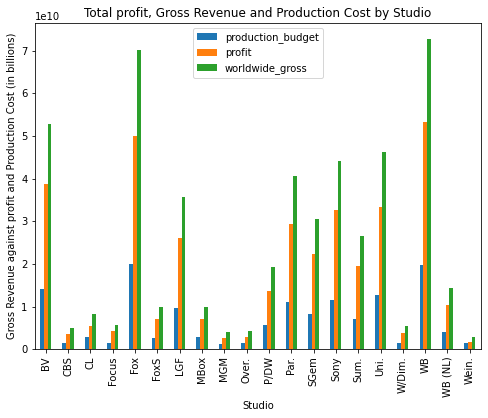

In [87]:
#Create a side by side bar plot of the production_budget, worldwide_gross and profit for each studio
ax = grouped[['production_budget', 'profit', 'worldwide_gross']].plot(kind='bar', figsize=(8, 6))

# Set the title and axis labels
ax.set_title('Total profit, Gross Revenue and Production Cost by Studio')
ax.set_xlabel('Studio')
ax.set_ylabel('Gross Revenue against profit and Production Cost (in billions)')

# Display the plot
plt.show()

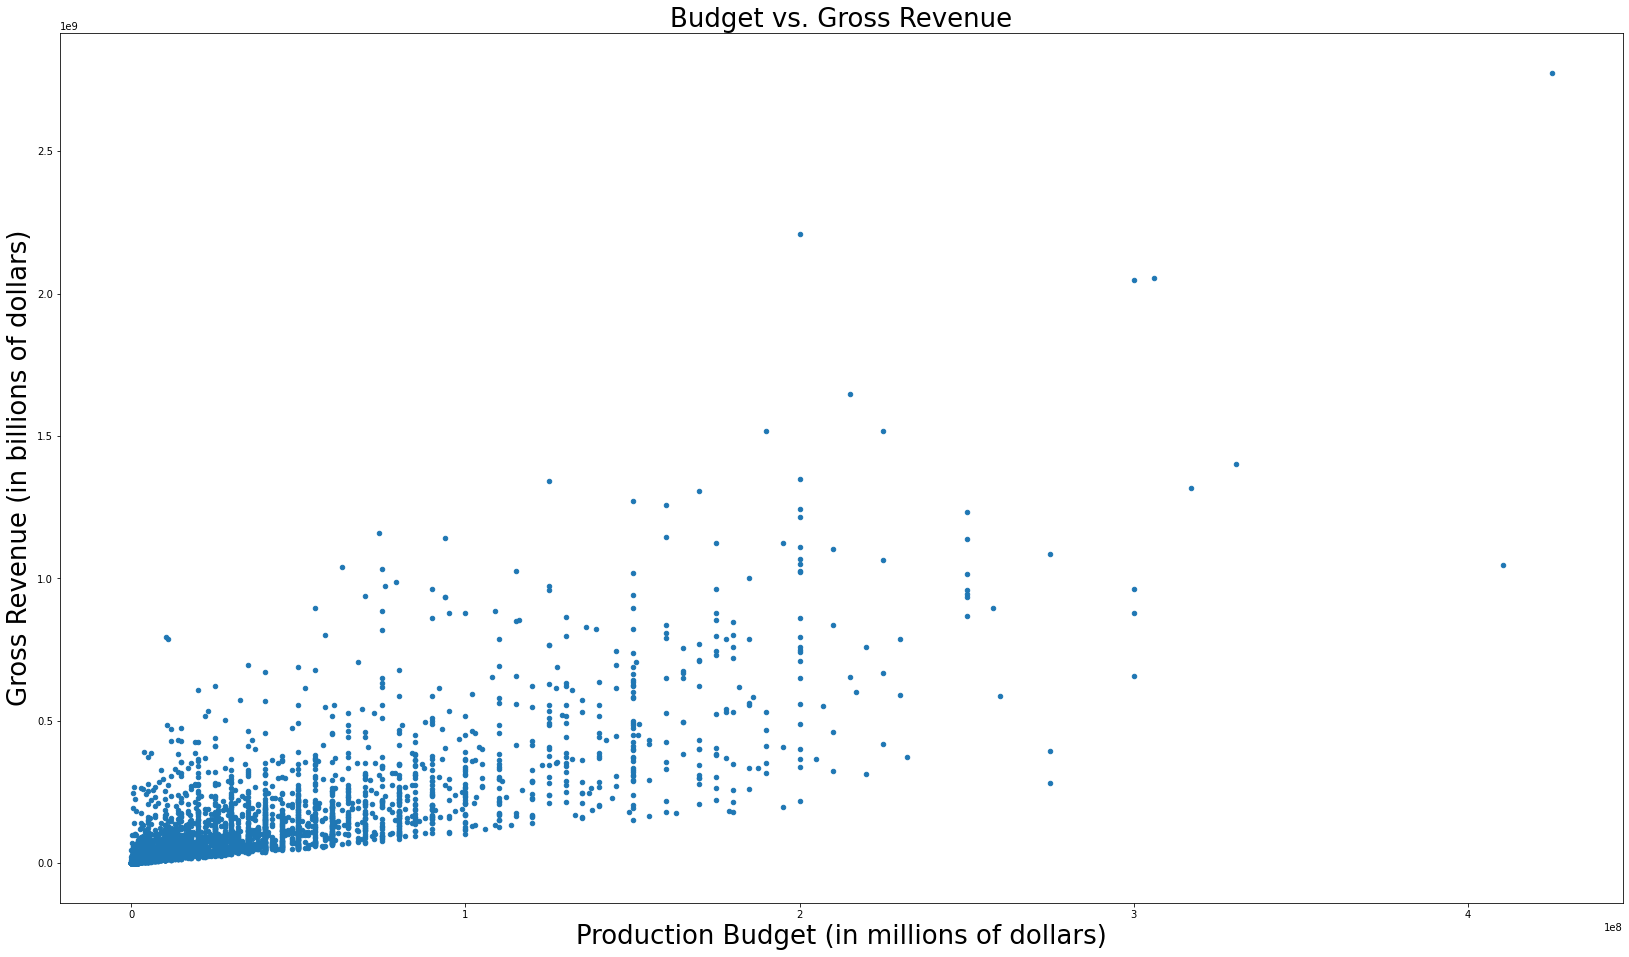

In [88]:
"""To understand the relationship between the production budget and the gross revenue for each movie,
we will create a Budget vs. Gross Revenue Scatter Plot"""

# Creating a scatter plot of the production_budget and worldwide_gross for each movie
ax = mov_analysis.plot(kind='scatter', x='production_budget', y='worldwide_gross', figsize=(28, 16))



# Set the title and axis labels
ax.set_title('Budget vs. Gross Revenue',fontsize=26)
ax.set_xlabel('Production Budget (in millions of dollars)',fontsize=26)
ax.set_ylabel('Gross Revenue (in billions of dollars)',fontsize=26)

# Display the plot
plt.show()

Text(0, 0.5, 'Gross Revenue (in billions of dollars)')

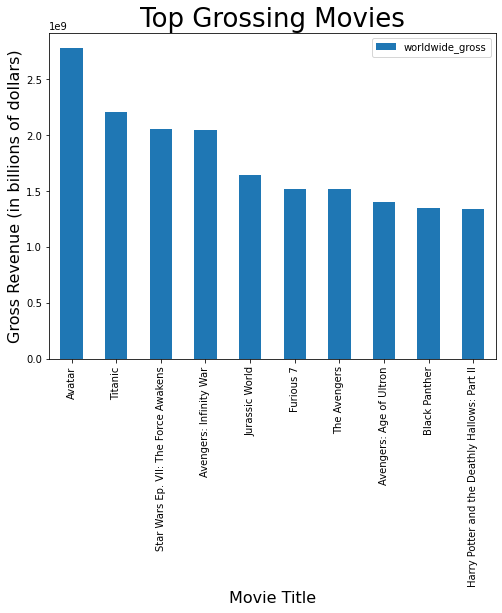

In [46]:
"""To identify the highest grossing movies and understand the studios that are the most successful,
we will plot Top Grossing Movies using a bar plot"""
#first we will plot the top grossing movie studios and limitthe results to the first ten
top_movies = mov_analysis.sort_values('worldwide_gross', ascending=False).head(10)
top_movies

# Creating a bar plot of the worldwide_gross for each movie
ax = top_movies.plot(kind='bar', x='title', y='worldwide_gross', figsize=(8, 6))

# Set the title and axis labels
ax.set_title('Top Grossing Movies',fontsize=26)
ax.set_xlabel('Movie Title',fontsize=16)
ax.set_ylabel('Gross Revenue (in billions of dollars)',fontsize=16)

Text(0, 0.5, 'Revenue(in billions of dollars)')

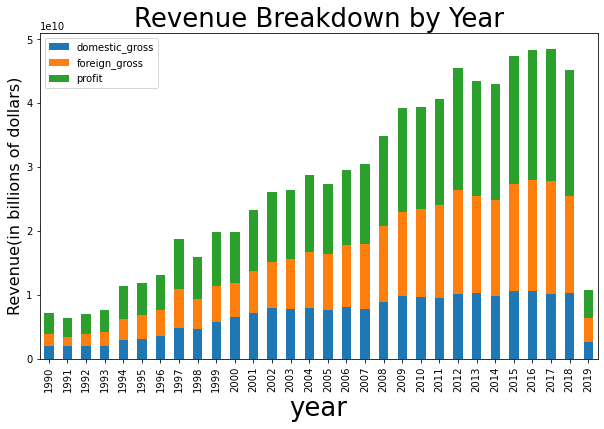

In [91]:
"""To help us understand the breakdown of revenue by year,
this will help us identify the years which have highest overall revenue.
We can plot a Revenue Breakdwon by year"""
# Group the data by year and sum up the worldwide_gross and foreign_gross and profit for each year
grouped = mov_analysis.groupby('year').agg({
    'domestic_gross': 'sum',
    'foreign_gross': 'sum',
    'profit': 'sum'
})
"""The data as grouped above creates aplot with all income values.
Since we are only intrested on the highest earning we will convert those below 1 billion to nan values,
then remove them from our data"""
# replace negative values with NaNs
grouped = grouped.mask(grouped < 1000000000)

# drop rows containing NaNs
grouped = grouped.dropna()

#creating a stacked bar plot of the grouped data above
ax = grouped.plot(kind='bar', stacked=True, figsize=(10,6))

#setting title and axis labels
ax.set_title("Revenue Breakdown by Year",fontsize=26)
ax.set_xlabel("year",fontsize=26)
ax.set_ylabel('Revenue(in billions of dollars)',fontsize=16)

Text(0, 0.5, 'Revenue(in billions of dollars)')

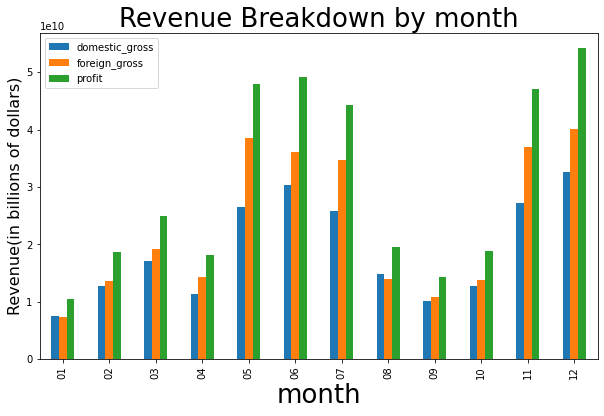

In [93]:
# Group the data by month and sum up the worldwide_gross and foreign_gross and profit for each year
grouped = mov_analysis.groupby('month').agg({
    'domestic_gross': 'sum',
    'foreign_gross': 'sum',
    'profit': 'sum'
})
#we will recreate the plot above but using the month instead
# replace negative values with NaNs
grouped = grouped.mask(grouped < 1000000000)

# drop rows containing NaNs
grouped = grouped.dropna()

#creating a stacked bar plot of the grouped data above
ax = grouped.plot(kind='bar', stacked=False, figsize=(10,6))

#setting title and axis labels
ax.set_title("Revenue Breakdown by month",fontsize=26)
ax.set_xlabel("month",fontsize=26)
ax.set_ylabel('Revenue(in billions of dollars)',fontsize=16)

### Reading Final dataset

#### Im Database

In [94]:
"""Reading Databases is a bit different abd more complex than reading a tabular dataset or csv. 
It is shown below."""
# Open up a connection
conn = sqlite3.connect('.Data/.im.db')
# Initialize a cursor
cursor = conn.cursor()

In [95]:
"""A database is a collection of different tables linked together via keys, 
which appear on every table creating a connection"""
#Here we will look at all the tables present in the database
table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [96]:
"""Below we will look at each table independently, but only for the tables relevant toour analysis at this time"""
#table one Movie Basics
imdb_mov_basic = pd.read_sql("""
SELECT *
FROM movie_basics

""",conn)
imdb_mov_basic

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,None


In [97]:
#table two Movie Ratings
imdb_mov_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings

""",conn)
imdb_mov_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21
...,...,...,...
73851,tt9805820,8.10,25
73852,tt9844256,7.50,24
73853,tt9851050,4.70,14
73854,tt9886934,7.00,5


In [98]:
#table Three Movie Akas
imdb_mov_aka = pd.read_sql("""
SELECT *
FROM movie_akas

""",conn)
imdb_mov_aka

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.00
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.00
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.00
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.00
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.00
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.00
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.00
331700,tt9880178,1,La atención,None,None,original,None,1.00
331701,tt9880178,2,La atención,ES,None,None,None,0.00


In [99]:
"""Using SQLite3 we will join relevant columns from the table toa dataframe we can use"""
#reading and joining columns to IMDB dataframe
imdb = pd.read_sql("""
SELECT  movie_basics.movie_id,
        movie_basics.genres,
        movie_basics.runtime_minutes,
        movie_ratings.averagerating,
        movie_akas.title
FROM movie_basics
JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
JOIN movie_akas ON movie_ratings.movie_id = movie_akas.movie_id;
""",conn)
imdb

,movie_id,genres,runtime_minutes,averagerating,title
0,tt0063540,"Action,Crime,Drama",175.00,7.00,Sangharsh
1,tt0063540,"Action,Crime,Drama",175.00,7.00,Sungharsh
2,tt0063540,"Action,Crime,Drama",175.00,7.00,Sunghursh
3,tt0063540,"Action,Crime,Drama",175.00,7.00,Sunghursh
4,tt0063540,"Action,Crime,Drama",175.00,7.00,Sunghursh
...,...,...,...,...,...
261801,tt9905462,Drama,111.00,8.40,Pengalila
261802,tt9905462,Drama,111.00,8.40,Sisterleaf
261803,tt9911774,Drama,130.00,8.40,Padmavyoohathile Abhimanyu
261804,tt9911774,Drama,130.00,8.40,Padmavyuhathile Abhimanyu


#### Cleaning resulting dataframe

In [100]:
#Checking for missing values
imdb.info()

print("We find there are missing values as follows:", imdb.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261806 entries, 0 to 261805
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         261806 non-null  object 
 1   genres           260621 non-null  object 
 2   runtime_minutes  250553 non-null  float64
 3   averagerating    261806 non-null  float64
 4   title            261806 non-null  object 
dtypes: float64(2), object(3)
memory usage: 10.0+ MB
We find there are missing values as follows: movie_id               0
genres              1185
runtime_minutes    11253
averagerating          0
title                  0
dtype: int64


In [101]:
#checking for Duplicates
print("Number of duplicated rows:", imdb.movie_id.duplicated().sum())
print("We observe:", imdb.movie_id.duplicated().sum(), "rows; have been duplicated and we drop them below")

#droping duplicated values
imdb.drop_duplicates(subset='movie_id',inplace=True)

print("Resulting dataframe has:", len(imdb), "rows; from the previous 261806" )
imdb

Number of duplicated rows: 192229
We observe: 192229 rows; have been duplicated and we drop them below
Resulting dataframe has: 69577 rows; from the previous 261806


,movie_id,genres,runtime_minutes,averagerating,title
0,tt0063540,"Action,Crime,Drama",175.00,7.00,Sangharsh
5,tt0066787,"Biography,Drama",114.00,7.20,Ashad Ka Ek Din
9,tt0069049,Drama,122.00,6.90,Al otro lado del viento
22,tt0069204,"Comedy,Drama",nan,6.10,Sabse Bada Sukh
25,tt0100275,"Comedy,Drama,Fantasy",80.00,6.50,La Telenovela Errante
...,...,...,...,...,...
261792,tt9899860,"Drama,Thriller",100.00,8.10,Didan in film jorm ast
261795,tt9899880,Comedy,85.00,5.80,Colombos
261797,tt9903952,"Comedy,Horror",87.00,9.20,BADMEN with a good behavior
261800,tt9905462,Drama,111.00,8.40,Pengalila


In [102]:
"""We further observe that the data missing in the movies_id column is a dulpicate
therefore we remove it from our dataset as below"""
imdb.movie_id.dropna(inplace=True)

In [103]:
"""It is standard practice to fill missing values with values already in our dataset,
which is what we have done here"""
#filling Null values
imdb.fillna(method='ffill',inplace=True)

#checking changes in the dataframe
imdb

,movie_id,genres,runtime_minutes,averagerating,title
0,tt0063540,"Action,Crime,Drama",175.00,7.00,Sangharsh
5,tt0066787,"Biography,Drama",114.00,7.20,Ashad Ka Ek Din
9,tt0069049,Drama,122.00,6.90,Al otro lado del viento
22,tt0069204,"Comedy,Drama",122.00,6.10,Sabse Bada Sukh
25,tt0100275,"Comedy,Drama,Fantasy",80.00,6.50,La Telenovela Errante
...,...,...,...,...,...
261792,tt9899860,"Drama,Thriller",100.00,8.10,Didan in film jorm ast
261795,tt9899880,Comedy,85.00,5.80,Colombos
261797,tt9903952,"Comedy,Horror",87.00,9.20,BADMEN with a good behavior
261800,tt9905462,Drama,111.00,8.40,Pengalila


In [104]:
merged_df = pd.merge(mov_analysis, imdb, left_on="title", right_on="title")
merged_df

,release_date,title,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year,profit,month,movie_id,genres,runtime_minutes,averagerating
0,"May 14, 2010",Robin Hood,210000000.00,105487148.00,322459006.00,Par.,216971858.00,2010,112459006.00,05,tt6858500,Family,105.00,7.60
1,"Feb 16, 2018",Black Panther,200000000.00,700059566.00,1348258224.00,Sony,648198658.00,2018,1148258224.00,02,tt1825683,"Action,Adventure,Sci-Fi",134.00,7.30
2,"Feb 16, 2018",Black Panther,200000000.00,700059566.00,1348258224.00,Sony,648198658.00,2018,1148258224.00,02,tt2905856,"Drama,Romance",79.00,6.20
3,"Dec 19, 1997",Titanic,200000000.00,659363944.00,2208208395.00,Fox,1548844451.00,1997,2008208395.00,12,tt2495766,Adventure,123.00,6.20
4,"Mar 5, 2010",Alice in Wonderland,200000000.00,334191110.00,1025491110.00,LGF,691300000.00,2010,825491110.00,03,tt2049386,"Fantasy,Musical",99.00,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,"Sep 23, 2011",Weekend,190000.00,484592.00,1577585.00,Fox,1092993.00,2011,1387585.00,09,tt5167782,Horror,71.00,3.80
554,"Jul 7, 2017",A Ghost Story,100000.00,1594798.00,2769782.00,Focus,1174984.00,2017,2669782.00,07,tt6265828,"Drama,Fantasy,Romance",92.00,6.80
555,"Mar 18, 2016",Krisha,30000.00,144822.00,144822.00,Sum.,0.00,2016,114822.00,03,tt4266638,Drama,83.00,7.20
556,"Sep 1, 2015",Exeter,25000.00,0.00,489792.00,Uni.,489792.00,2015,464792.00,09,tt2782686,Horror,90.00,5.70


In [105]:
merged_df.shape

(558, 14)

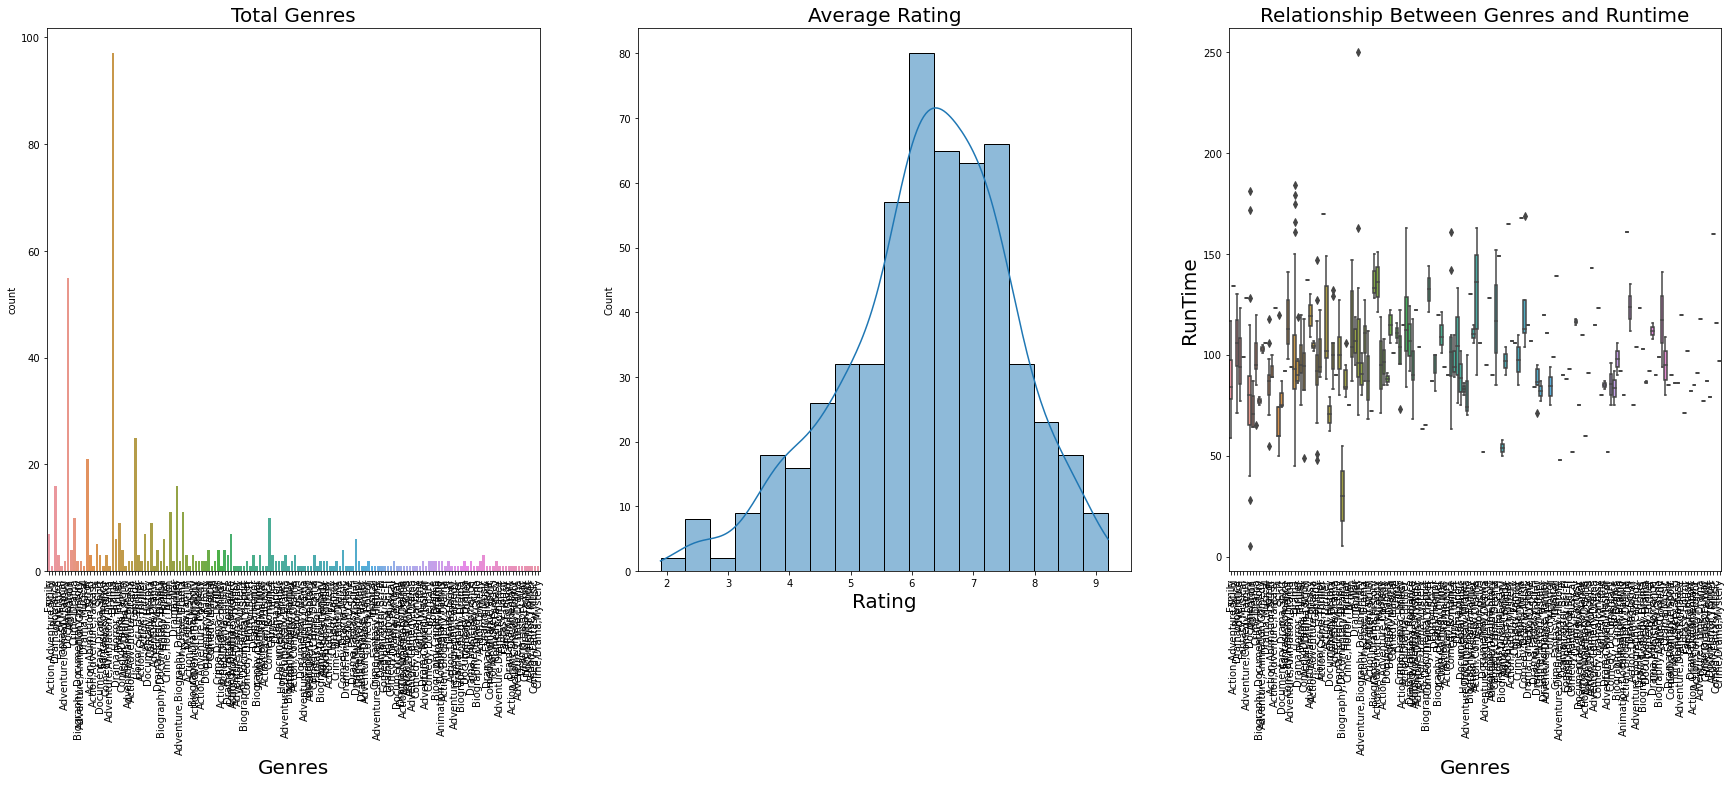

In [111]:
"""Below we will plot several plots that show a summary of our merged dataframe
The resulting plots might not be clearly visible, 
but we only want tosee the shape of the plotted data and not neccesarily the content"""
#creating the plot
fig, axes = plt.subplots(ncols=3, figsize=(30,10))

# count plot
sns.countplot(data=merged_df, x='genres', ax=axes[0], )
axes[0].set_title("Total Genres", fontsize=20)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_xlabel("Genres", fontsize=20)

# histogram
sns.histplot(data=merged_df, x='averagerating', kde=True, ax=axes[1])
axes[1].set_title("Average Rating", fontsize=20)
axes[1].set_xlabel("Rating", fontsize=20)

# box plot
sns.boxplot(data=merged_df, x='genres', y='runtime_minutes', ax=axes[2])
axes[2].set_title("Relationship Between Genres and Runtime", fontsize=20)
axes[2].tick_params(axis='x', rotation=90)
axes[2].set_xlabel("Genres", fontsize=20)
axes[2].set_ylabel("RunTime", fontsize=20)


#displaying the plots
plt.subplots_adjust(hspace=10.5)
plt.show()

In [108]:
"""We might want to group the data using the genres column in order to carry out analysis 
on the runtimes and ratings for each genre"""
#we will group the data as follows
grouped_data = merged_df.groupby('studio')
#to have data displayed ina dataframe we would need to aggregate the values in the other columns. 
studio_data = grouped_data.mean()[['runtime_minutes', 'averagerating']]
studio_data = studio_data.reset_index(0)
studio_data

,studio,runtime_minutes,averagerating
0,BV,105.74,6.32
1,CBS,103.00,4.00
2,CL,95.77,6.48
3,Focus,108.50,7.25
4,Fox,96.97,6.32
5,FoxS,102.79,6.78
6,LGF,94.55,6.41
7,MBox,99.73,6.33
8,MGM,91.89,6.70
9,Over.,91.71,5.43


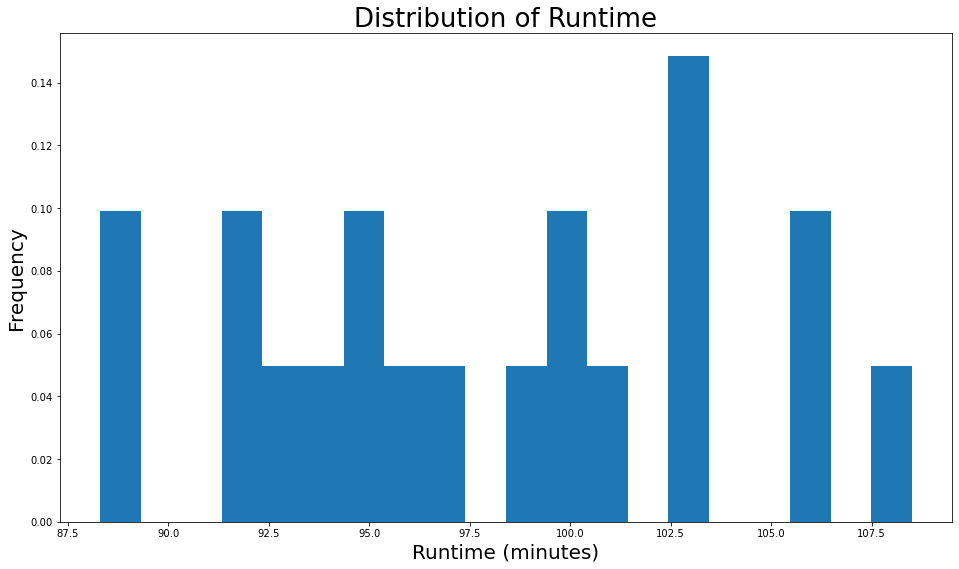

In [129]:
"""This is a plot that shows the average runtime for movies."""
# Create a histogram of runtime
plt.figure(figsize=(16,9))
plt.hist(studio_data['runtime_minutes'], density=True, bins=20)
plt.xlabel('Runtime (minutes)',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.title('Distribution of Runtime',fontsize=26)
plt.show()

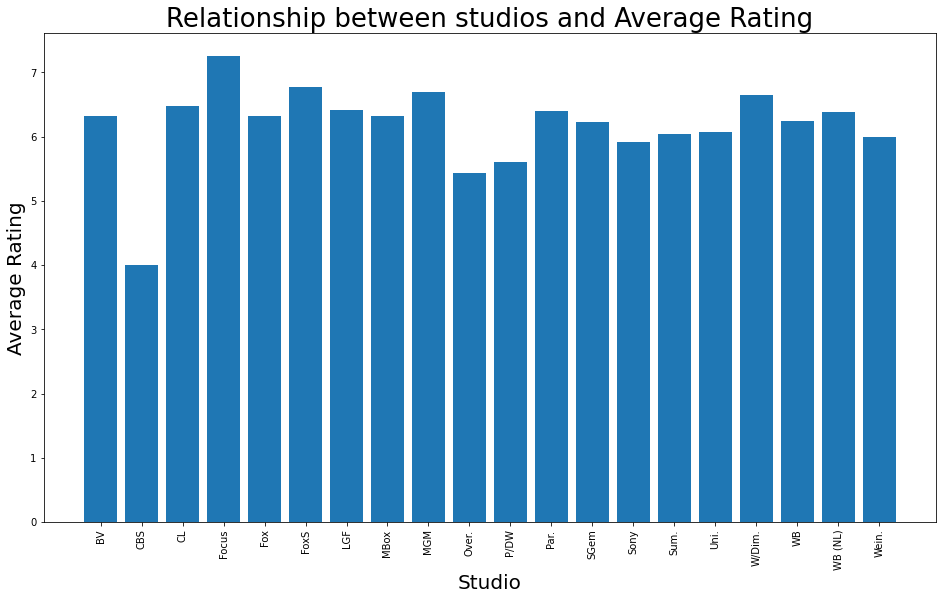

In [125]:
"""This is a plot that shows the relationship between studio and average rating for movies."""
# Create a histogram of runtime
plt.figure(figsize=(16,9))
plt.bar(studio_data['studio'], height=studio_data['averagerating'])
plt.xlabel('Studio',fontsize=20)
plt.ylabel('Average Rating',fontsize=20)
plt.title('Relationship between studios and Average Rating',fontsize=26)
plt.xticks(rotation=90)
plt.show()

In [130]:
#grouping genre and average rating
#we will group the data as follows
grouped1_data = merged_df.groupby('genres')
#to have data displayed ina dataframe we would need to aggregate the values in the other columns. 
genre_data = grouped1_data.sum()[['runtime_minutes','averagerating']].sort_values(by='averagerating',ascending=False)
genre_data = genre_data.reset_index(0)
genre_data

,genres,runtime_minutes,averagerating
0,Drama,9694.00,622.80
1,Documentary,4380.00,388.80
2,Comedy,2311.00,152.30
3,Horror,1806.00,103.60
4,"Drama,Romance",1684.00,97.90
...,...,...,...
149,"Action,Drama,Romance",143.00,3.60
150,"Comedy,Romance,Sport",90.00,2.90
151,"Comedy,Mystery,Sci-Fi",88.00,2.70
152,"Comedy,Family",106.00,2.50


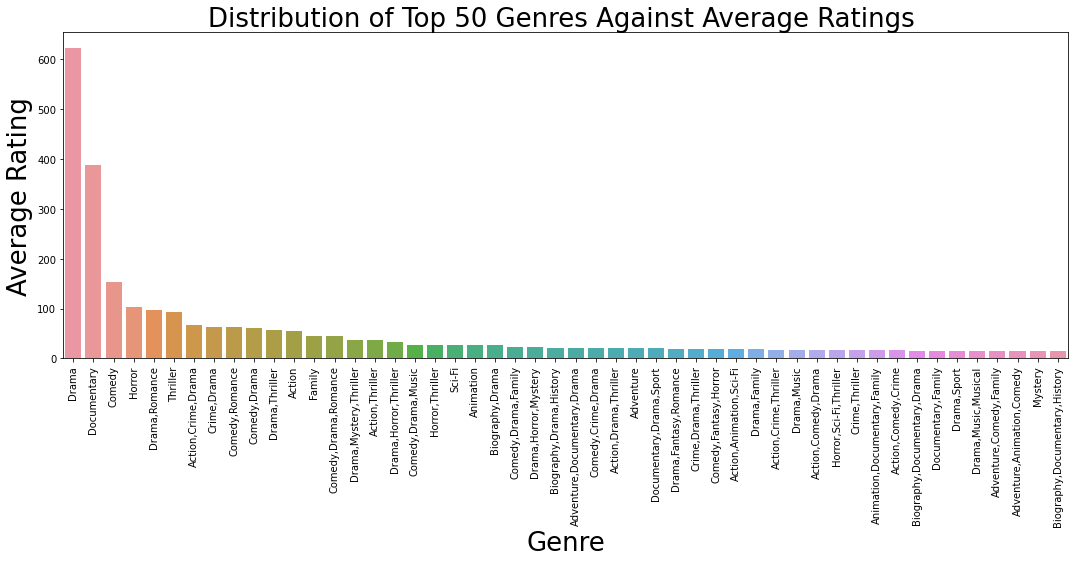

In [135]:
"""We can also draw a bar graph showing the distribution of average ratings against genre
Using the combined data,we observe a very unclear plot is presented. 
This can easily be corrected by creating a subset from containing only genre and rating
this still does not get us the desired results, we therefore sort the data in descending order,
and only plot the highest rated movies"""
# Create a box plot of average ratings by genre

y_to_plot = genre_data['averagerating'].head(50)
x_to_plot = genre_data['genres'].head(50)

plt.figure(figsize=(18,6))
sns.barplot(x=x_to_plot, y=y_to_plot,  data=genre_data)
plt.xticks(rotation=90)
plt.xlabel('Genre',fontsize=26)
plt.ylabel('Average Rating',fontsize=26)
plt.title('Distribution of Top 50 Genres Against Average Ratings ',fontsize=26)
plt.show()

In [137]:
"""Here we will plot the relationship between Genres and Revenue and profit versus cost of production.
The data will be subset as follows"""
#grouping genre and average rating
#we will group the data as follows
grouped2_data = merged_df.groupby('genres')
#to have data displayed ina dataframe we would need to aggregate the values in the other columns. 
genre_earn = grouped2_data.mean()[['production_budget','worldwide_gross','profit']]#.sort_values(by='worldwide_gross' ascending=False, inplace=True)
genre_earn = genre_earn.reset_index(0)

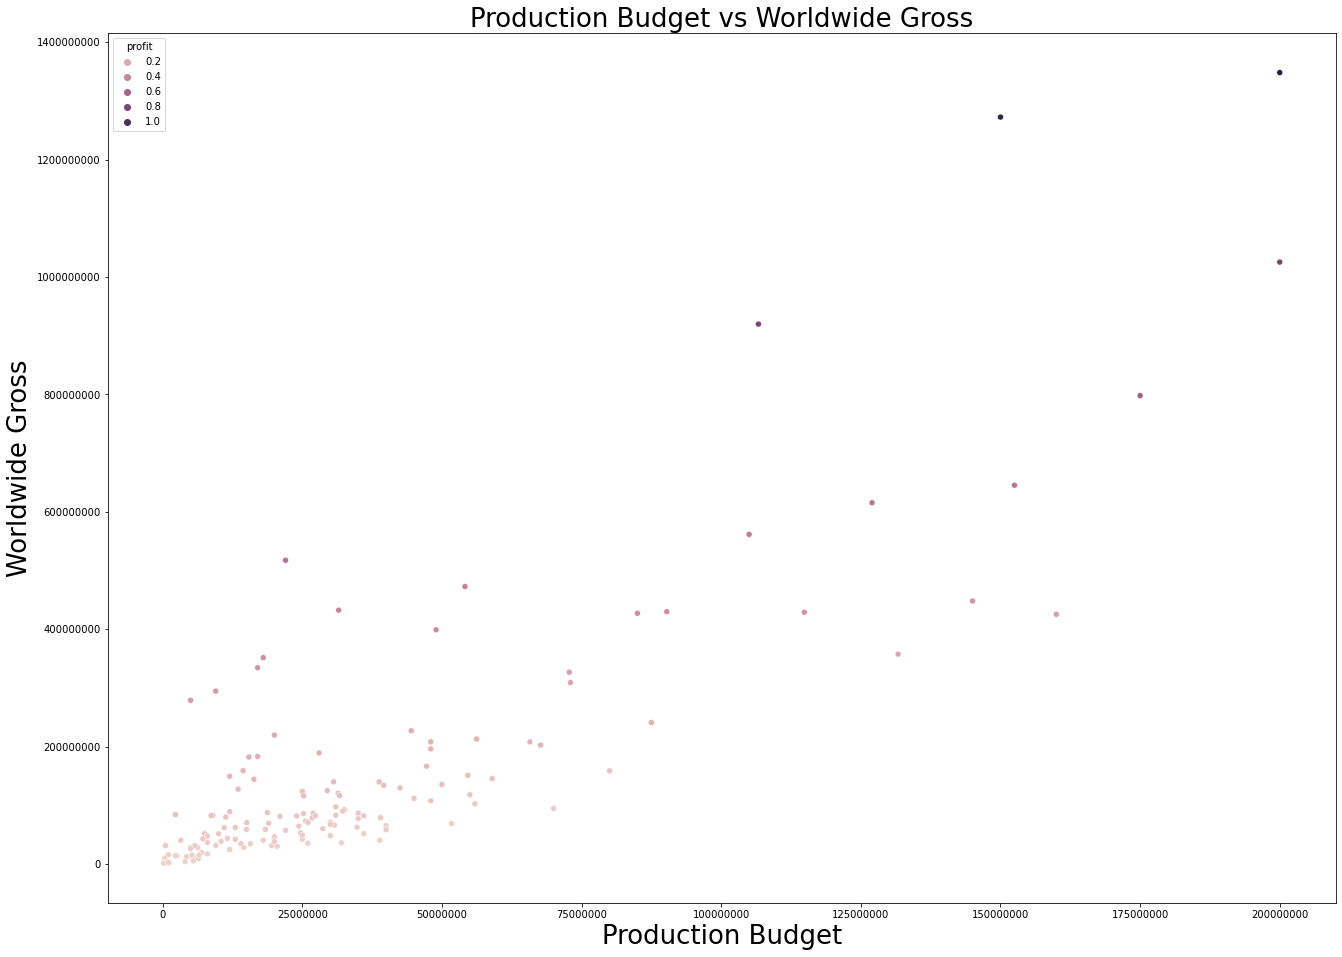

In [145]:
#We will begin with a Scatter plot to show the relationship between production_budget and worldwide_gross

plt.figure(figsize=(22,16))
sns.scatterplot(data=genre_earn, x='production_budget', y='worldwide_gross', hue='profit')
plt.title('Production Budget vs Worldwide Gross',fontsize=26)
plt.xlabel('Production Budget',fontsize=26)
plt.ylabel('Worldwide Gross',fontsize=26)
plt.ticklabel_format(style='plain',axis='both')
plt.show()

In [147]:
# Action
action_movies = merged_df[merged_df['genres'].str.contains('Action')]

# Adventure
adventure_movies = merged_df[merged_df['genres'].str.contains('Adventure')]

# Animation
animation_movies = merged_df[merged_df['genres'].str.contains('Animation')]

# Comedy
comedy_movies = merged_df[merged_df['genres'].str.contains('Comedy')]

# Crime
crime_movies = merged_df[merged_df['genres'].str.contains('Crime')]

# Documentary
documentary_movies = merged_df[merged_df['genres'].str.contains('Documentary')]

# Drama
drama_movies = merged_df[merged_df['genres'].str.contains('Drama')]

# Family
family_movies = merged_df[merged_df['genres'].str.contains('Family')]

# Fantasy
fantasy_movies = merged_df[merged_df['genres'].str.contains('Fantasy')]

# History
history_movies = merged_df[merged_df['genres'].str.contains('History')]

# Horror
horror_movies = merged_df[merged_df['genres'].str.contains('Horror')]

# Music
music_movies = merged_df[merged_df['genres'].str.contains('Music')]

# Mystery
mystery_movies = merged_df[merged_df['genres'].str.contains('Mystery')]

# Romance
romance_movies = merged_df[merged_df['genres'].str.contains('Romance')]

# Science Fiction
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Science Fiction')]

# Thriller
thriller_movies = merged_df[merged_df['genres'].str.contains('Thriller')]

# War
war_movies = merged_df[merged_df['genres'].str.contains('War')]

# Western
western_movies = merged_df[merged_df['genres'].str.contains('Western')]


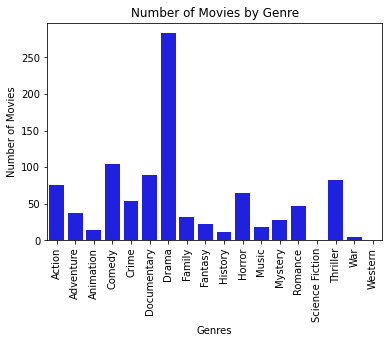

In [148]:
"""Here we will create a bar chart using the above subset data in order to get
the number of movies in each genre.
This will help assertain the findings from the plot with ratings and genre"""

#first, we Create a list of all genres
genres = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
          'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 
          'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 
          'Thriller', 'War', 'Western']

# Next, a list of counts for each genre
counts = [len(action_movies), len(adventure_movies), len(animation_movies), 
          len(comedy_movies), len(crime_movies), len(documentary_movies), 
          len(drama_movies), len(family_movies), len(fantasy_movies), 
          len(history_movies), len(horror_movies), len(music_movies), 
          len(mystery_movies), len(romance_movies), len(sci_fi_movies), 
          len(thriller_movies), len(war_movies), len(western_movies)]

# Create the bar plot using Seaborn
ax = sns.barplot(x=genres, y=counts, color='b')

# Customize the plot
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.xticks(rotation=90)


# Show the plot
plt.show()

### Subsets for Key Performance Indicators

Some of the Key performance indicators include:
1. High-budget films: films with a production budget above a certain threshold (e.g. $100 million)
2. Successful films: films with a high domestic and/or worldwide gross (e.g. in the top quartile)
3. Studio-specific subsets: subsets for each major studio (e.g. Disney, Warner Bros., Universal, etc.)
4. Genre-specific subsets: subsets for each major film genre (e.g. action, comedy, drama, etc.)
5. Time-specific subsets: subsets for specific time periods (e.g. decade, year)
6. International subsets: subsets focused on non-U.S. markets, such as films that performed well in specific countries or regions.

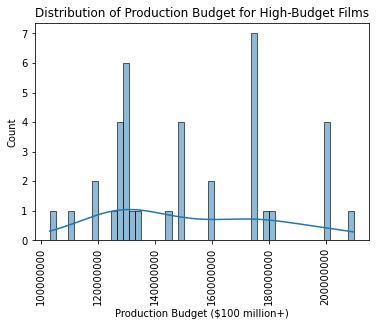

In [165]:
#first KPI
#High-budget films
high_budget_films = merged_df[merged_df['production_budget'] > 100000000]
high_budget_films

# create histogram of production budget distribution
sns.histplot(data=high_budget_films, x='production_budget', bins=50, kde=True)
plt.title('Distribution of Production Budget for High-Budget Films')
plt.xlabel('Production Budget ($100 million+)')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90)
plt.show()

,release_date,title,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year,profit,month,movie_id,genres,runtime_minutes,averagerating
42,"Mar 9, 2018",A Wrinkle in Time,103000000.00,100478608.00,133401882.00,Fox,32923274.00,2018,30401882.00,03,tt1620680,"Adventure,Family,Fantasy",109.00,4.20
41,"Mar 31, 2017",Ghost in the Shell,110000000.00,40563557.00,167910690.00,Fox,127347133.00,2017,57910690.00,03,tt4337072,"Action,Animation,Sci-Fi",100.00,6.70
39,"Aug 9, 2013",Elysium,120000000.00,93050117.00,286192091.00,Uni.,193141974.00,2013,166192091.00,08,tt1783264,Drama,100.00,6.00
40,"Jul 22, 2005",The Island,120000000.00,35818913.00,163018913.00,Over.,127200000.00,2005,43018913.00,07,tt1737256,"Drama,Romance",95.00,5.10
17,"May 19, 1998",Godzilla,125000000.00,136314294.00,376000000.00,BV,239685706.00,1998,251000000.00,05,tt5979874,"Action,Animation,Sci-Fi",89.00,6.00
38,"Mar 3, 2017",Logan,127000000.00,226277068.00,615461394.00,WB,389184326.00,2017,488461394.00,03,tt3315342,"Action,Drama,Sci-Fi",137.00,8.10
37,"Mar 3, 2017",Logan,127000000.00,226277068.00,615461394.00,WB,389184326.00,2017,488461394.00,03,tt1483010,"Comedy,Drama,Family",94.00,6.20
36,"May 19, 2000",Dinosaur,127500000.00,137748063.00,356148063.00,Fox,218400000.00,2000,228648063.00,05,tt6317070,Drama,150.00,8.60
35,"May 19, 2000",Dinosaur,127500000.00,137748063.00,356148063.00,Fox,218400000.00,2000,228648063.00,05,tt1843902,Animation,77.00,7.20
26,"Mar 27, 2015",Home,130000000.00,177397510.00,385997896.00,BV,208600386.00,2015,255997896.00,03,tt2075392,Drama,76.00,6.00
